# LAB 퍼셉트론

<img width="50%" src="https://i.imgur.com/LbyvxVP.png" >

* 퍼셉트론 개요
* 파이썬 구현
* Scikit-Learn 구현
* 장단점

### 2018 FinanceData.KR http://financedata.kr

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)

#  퍼셉트론(perceptron)
* 가장 오래되고 단순한 형태의 판별 함수 기반 예측 모형(discriminant function based predition model)
* 동물의 신경(neuron) 구조에 기반한 아이디어, 1962년 Rosenblatt

# 퍼셉트론의 구성

* 임계치(threshold): 어떠한 값이 활성화되기 위한 최소값
* 가중치(weight): 선형 경계의 방향성 또는 형태를 나타내는 값들
* 바이어스(bias): 선형 경계의 절편 (직선의 경우는 y절편)
* net값: 입력값과 가중치의 곱을 모두 합한 값
* 활성함수(activation function):  net값이 임계치보다 크면 1을 출력, 작으면 0을 출력하는 함수
* 뉴런(neuron): 인공신경망을 구성하는 기본 요소
    
<img width="50%" src="https://i.imgur.com/6t1GiPc.png" >

퍼셉트론은 입력 $x=(1, x_1,⋯, x_m )$ 에 대해 1 또는 -1의 값을 갖는  y 를 출력하는 비선형 함수

$$ y = f(w^Tx) $$

퍼셉트론 활성화 함수

$$ y = f(z) = \begin{cases} -1, & z < 0, \\ 1, & z \ge 0 \end{cases}  $$


### Pseudo code
```python
if (x1*w1 + x2*w2 +  x3*w3 ... xn*wn) > z:
    y = 1
else:
    y = -1
```

# 퍼셉트론과 선형분리
* 학습 데이터가 선형 분리될 수 있을 때 적합한 알고리즘
* 학습이 반복될 수 록 선의 기울기가 달라진다 <br> (학습을 하면서 weight가 계속 조정)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Perceptron_example.svg/500px-Perceptron_example.svg.png" >
   
https://en.wikipedia.org

# Python 퍼셉트론 구현

In [2]:
import numpy as np

# 데이터
X = np.array([
    [-2, 4, -1],
    [4,  1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

# 레이블
y = np.array([-1, -1, 1, 1, 1])

# 학습율과 에포크 지정
eta = 1
epochs = 20

# 퍼셉트론 SGD
w = np.zeros(len(X[0]))
for t in range(epochs):
    for i, x in enumerate(X):
        if (np.dot(X[i], w)*y[i]) <= 0:
            w = w + eta*X[i]*y[i]

# 가중치값들 출력 
print(w)

[  2.   3.  13.]


In [3]:
# 데이터
X = np.array([
    [-2, 4],
    [4,  1],
    [1, 6],
    [2, 4],
    [6, 2],
])

# 바이어스 추가
b = np.full((len(X), 1), -1)
X = np.append(X, b, axis=1)
X

array([[-2,  4, -1],
       [ 4,  1, -1],
       [ 1,  6, -1],
       [ 2,  4, -1],
       [ 6,  2, -1]])

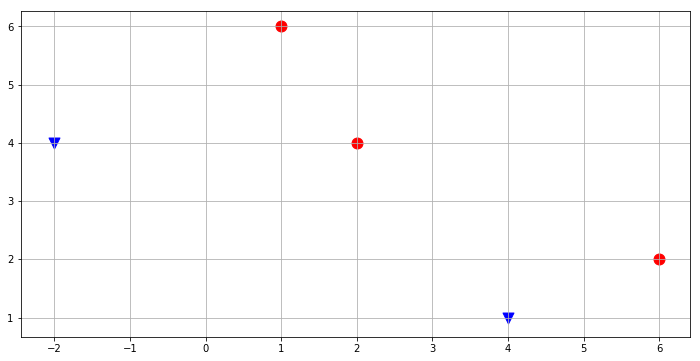

In [4]:
plt.scatter(X[y > 0, 0], X[y > 0, 1], s=120, marker='o', c='r')
plt.scatter(X[y < 0, 0], X[y < 0, 1], s=120, marker='v', c='b')

# SGD 구현
SGD(Stochastic Gradient Descent): 일부 표본 데이터만 사용하여 gradient의 추정치 산출하는 방법
* 퍼셉트론은 SGD 최적화 사용
* 한번에 하나의 오분류된 데이터만을 이용하여 가중치를 조정
* $η_k$는 학습률(learning rate)

$$ w_{k+1}=w_k+η_k x_i y_i $$

In [5]:
w = np.zeros(len(X[0]))

eta = 1
n = 20
errors = []

for t in range(n):
    total_error = 0
    for i, x in enumerate(X):
        err = np.dot(X[i], w)*y[i]
        if err <= 0:
            total_error += err
            w = w + eta*X[i]*y[i]
    print(t, -1 * total_error)
    errors.append(-1 * total_error)

0 42.0
1 39.0
2 36.0
3 33.0
4 32.0
5 30.0
6 27.0
7 30.0
8 24.0
9 44.0
10 27.0
11 24.0
12 21.0
13 16.0
14 0
15 0
16 0
17 0
18 0
19 0


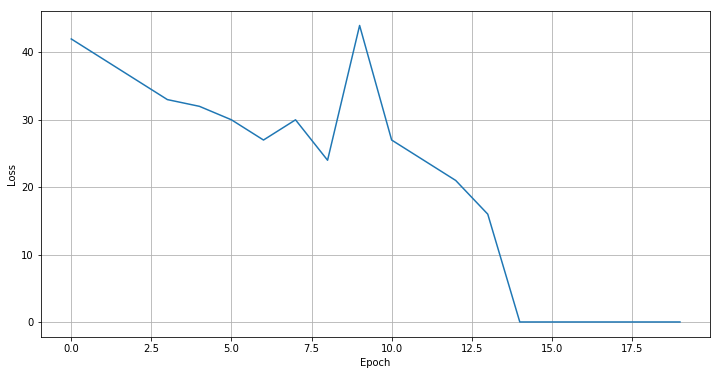

In [6]:
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 결과 (가중치 값)

In [7]:
w

array([  2.,   3.,  13.])

# 테스트

In [8]:
def predict(X):
    return np.sign( np.dot(np.append(X, [-1]), w))

# 기존 데이터
X = [
    [-2, 4],
    [4,  1],
    [1, 6],
    [2, 4],
    [6, 2],
]

for i, x in enumerate(X):
    print( x, predict(x) )

[-2, 4] -1.0
[4, 1] -1.0
[1, 6] 1.0
[2, 4] 1.0
[6, 2] 1.0


In [9]:
# 새로운 데이터에 대해 테스트

print([2, 2], predict([2, 2]) )
print([4, 3], predict([4, 3]) )

[2, 2] -1.0
[4, 3] 1.0


# Scikit-Learn 퍼셉트론 구현

In [10]:
# 데이터
X = np.array([
    [-2, 4],
    [4,  1],
    [1, 6],
    [2, 4],
    [6, 2],
])

# 레이블
y = np.array([-1, -1, 1, 1, 1])

In [11]:
from sklearn.linear_model import Perceptron

# n_iter : 에포크 수(=훈련 횟수, =가중치를 조종 횟수)
# eta0 : 학습률
m = Perceptron(max_iter=20, eta0=1)
m.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1, fit_intercept=True,
      max_iter=20, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [12]:
# 계수(기울기), 절편

m.coef_, m.intercept_

(array([[ 2.,  3.]]), array([-13.]))

# 퍼셉트론 라인 (decision boundary)

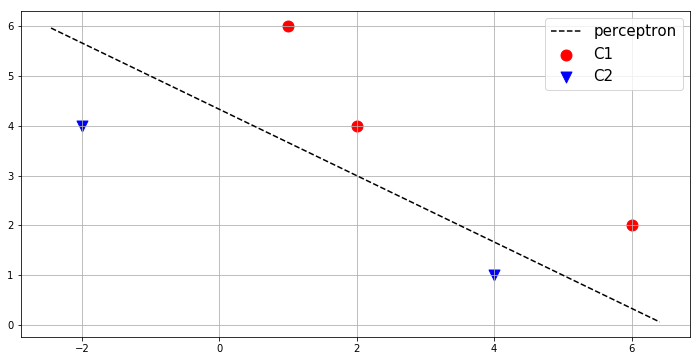

In [13]:
# 데이터 그리기
plt.scatter(X[y > 0, 0], X[y > 0, 1], s=120, marker='o', c='r', label='C1')
plt.scatter(X[y < 0, 0], X[y < 0, 1], s=120, marker='v', c='b', label='C2')

# 퍼셉트론 라인 (decision boundary)
w = m.coef_[0]
a = -w[0] / w[1]
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax)
yy = a * xx - (m.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k--', label='perceptron')

plt.legend(fontsize = 15)

In [14]:
m.predict([[2, 2], [4, 3]])

array([-1,  1])

# 모델 평가

metrics모듈을 통해 가능한 여러 가지 성능 메트릭을 아주 다양하게 구현

In [15]:
from sklearn.metrics import accuracy_score

predict = m.predict(X)
print('Accuracy: %.2f' % accuracy_score(y, predict))

Accuracy: 1.00


# 요약
* 초기 신경망 모델 알고리즘, 단순하고 간편
* 퍼셉트론의 한계: 완전 선형 분리가 가능하지 않은 경우 수렴하지 않는다
* 예, AND, OR에 대해 수렴된 가중치 구할 수 있으나, Exclusive-OR(XOR)연산은 학습불가        

# LAB
* 파이썬 구현의 데이터 X와 레이블 y를 수정해서 다시 실행
* Scikit-Learn 구현의 데이터 X와 레이블 y를 수정해서 다시 실행 
* 에포크 수 n_iter=1, n_iter=20 일 때 각각 퍼셉트론 라인 그리기
* accuracy_score() 사용법 익히기

### 2018 http://financedata.kr